In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [2]:
pic=Image.open('cod.png')

In [3]:
type(pic)

PIL.PngImagePlugin.PngImageFile

In [4]:
pic_arr=np.asarray(pic)

In [5]:
type(pic_arr)

numpy.ndarray

In [6]:
pic_arr.shape

(768, 1366, 3)

In [7]:
pic_red=pic_arr.copy()

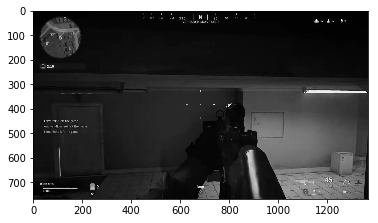

In [8]:
plt.imshow(pic_red[:,:,0],cmap='gray')

In [19]:
img=cv2.imread('cod.png')

In [20]:
img.shape

(768, 1366, 3)

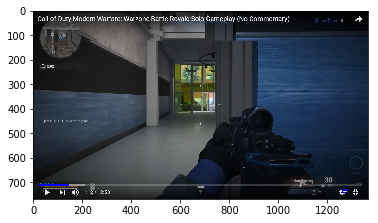

In [21]:
plt.imshow(img)

In [22]:
fix_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

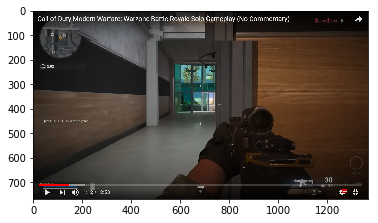

In [23]:
plt.imshow(fix_img)

In [24]:
cv2.rectangle(fix_img,pt1=(0,410),pt2=(300,550),color=(0,255,0),thickness=5)

array([[[10, 10, 10],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [ 2,  1,  1],
        [ 2,  1,  1],
        [ 0,  0,  0]],

       [[11, 11, 11],
        [11, 11, 11],
        [12, 12, 12],
        ...,
        [ 2,  2,  1],
        [ 2,  2,  1],
        [ 0,  0,  0]],

       [[11, 11, 11],
        [11, 11, 11],
        [12, 12, 12],
        ...,
        [ 2,  2,  1],
        [ 2,  2,  1],
        [ 0,  0,  0]],

       ...,

       [[10, 10,  9],
        [10, 10,  9],
        [10, 10,  9],
        ...,
        [ 7,  4,  2],
        [ 7,  4,  2],
        [ 0,  0,  0]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [ 9,  9,  9],
        ...,
        [ 7,  4,  2],
        [ 7,  4,  2],
        [ 0,  0,  0]],

       [[ 9,  9,  8],
        [ 9,  9,  8],
        [ 9,  9,  8],
        ...,
        [ 6,  3,  2],
        [ 6,  3,  2],
        [ 0,  0,  0]]], dtype=uint8)

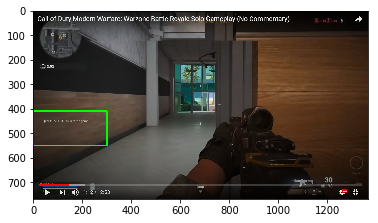

In [25]:
plt.imshow(fix_img)

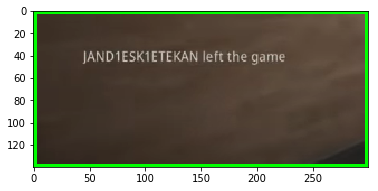

In [26]:
plt.imshow(fix_img[410:550,0:300])

In [17]:
img=fix_img[410:550,0:300]

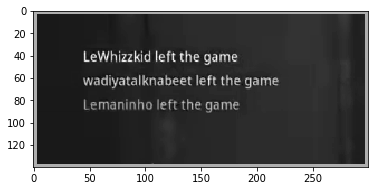

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap="gray")

In [37]:
ret, thresh1 = cv2.threshold(gray, 200, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [38]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

In [39]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1) 

In [40]:
_, contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [41]:
im2 = img.copy()

In [42]:
file = open("recognized.txt", "w+") 
file.write("") 
file.close()

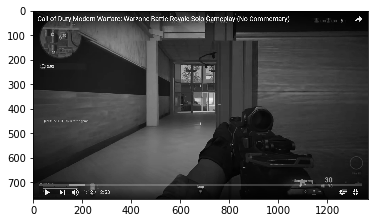

In [45]:
plt.imshow(gray,cmap="gray")

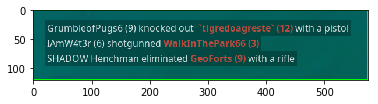

In [76]:
for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
      
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
      
    # Cropping the text block for giving input to OCR 
    cropped = im2[y:y + h, x:x + w] 
      
    # Open the file in append mode 
    file = open("recognized.txt", "a") 
      
    plt.imshow(cropped)
    file.close 